In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
train = pd.read_csv('cleaned_dataset_final.csv')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = train.drop('Persistent',axis=1)
y = train['Persistent']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2396, 62)
(2396,)
(1028, 62)
(1028,)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression(max_iter=1000)

In [40]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       654
           1       0.75      0.69      0.72       374

    accuracy                           0.80      1028
   macro avg       0.79      0.78      0.78      1028
weighted avg       0.80      0.80      0.80      1028



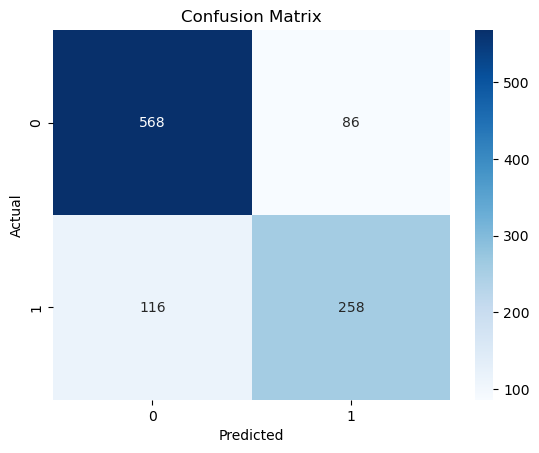

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [46]:
from sklearn.metrics import roc_auc_score

y_proba = logmodel.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.8723773078872916
